<h1>Visualising Austin Crime Data and locating Austin restaurants using Foursquare</h1>

In [96]:
import pandas as pd
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
from folium.plugins import HeatMap
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import requests 
%matplotlib inline
print('Done')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Done


I will statr with Austin Crime Data. Data need to be leaned and prepared for the visialization. Tt will help to get a better understanding of the Austin Crime Dataset.

This dataset reflects reported incidents of crime that occurred in the City of Austin from 2015 to 2018. Data is extracted from the https://data.austintexas.gov .

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}  
</style>
</head>
    
<body>
<table style="width:100%">
  <tr>
    <th>Field </th>
    <th>Description</th> 
  </tr>
    
  <tr>
    <td>Incident Number </td>
    <td>Incident report number</td>
  </tr>
    
  <tr>
    <td>Highest Offense Description </td>
    <td>Description</td>
  </tr>
    
  <tr>
    <td>Highest Offense Code </td>
    <td>Code</td>
  </tr>
    
  <tr>
    <td>Family Violence </td>
    <td>Incident involves family violence? Y = yes, N = no</td>
  </tr>
    
  <tr>
    <td>Occurred Date Time </td>
    <td>Date and time (combined) incident occurred</td>
  </tr>
 
  <tr>
    <td>Occurred Date </td>
    <td>Date the incident occurred</td>
  </tr>
    
  <tr>
    <td>Occurred Time </td>
    <td>Time the incident occurred</td>
  </tr>
    
  <tr>
    <td>Report Date Time </td>
    <td>Date and time (combined) incident was reported</td>
  </tr>    
   
   <tr>
    <td>Report Date </td>
    <td>Date the incident was reported </td>
  </tr>   
    
   <tr>
    <td>Report Time </td>
    <td>Time the incident was reported </td>
  </tr>
    
   <tr>
    <td>Location Type </td>
    <td>General description of the premise where the incident occurred </td>
  </tr>

   <tr>
    <td>Address </td>
    <td>Incident location </td>
  </tr>

   <tr>
    <td>Zip code </td>
    <td>Zip code where incident occurred </td>
  </tr>
    
   <tr>
    <td>Council District </td>
    <td>Austin city council district where the incident occurred </td>
  </tr>    
    
   <tr>
    <td>APD Sector </td>
    <td>APD sector where incident occurred </td>
  </tr>

   <tr>
    <td>APD District </td>
    <td>APD district where incident occurred </td>
  </tr>

   <tr>
    <td>PRA </td>
    <td>APD police reporting area where incident occurred </td>
  </tr>
    
   <tr>
    <td>Census </td>
    <td>Tract Census tract where incident occurred  </td>
  </tr>
   
   <tr>
    <td>Clearance Status </td>
    <td>How/whether crime was solved (see Clearance lookup) </td>
  </tr>
    
   <tr>
    <td>Clearance Date </td>
    <td>Date crime was solved </td>
  </tr>
    
   <tr>
    <td>UCR Category </td>
    <td>Code for the most serious crimes identified by the FBI as part of
its Uniform Crime Reporting program </td>
  </tr>
    
   <tr>
    <td>Category Description </td>
    <td>Description for the most serious crimes identified by the FBI as
part of its Uniform Crime Reporting program </td>
  </tr>
    
   <tr>
    <td>X-coordinate </td>
    <td>X-coordinate where the incident occurred </td>
  </tr>

   <tr>
    <td>Y-coordinate </td>
    <td>Y-coordinate where the incident occurred </td>
  </tr>
    
   <tr>
    <td>Latitude </td>
    <td>Latitude where incident occurred </td>
  </tr>
    
   <tr>
    <td>Longitude </td>
    <td>Longitude where the incident occurred </td>
  </tr>
    
   <tr>
    <td>Location </td>
    <td>3rd party generated spatial column </td>
  </tr>
    
   </table>
</body>
</html>


<h2>Import the Austin Crime DataSet</h2>

The full dataset, 2015 to 2018 contains over 441202 rows. This makes processing the dataset difficult and time consuming. Only the 2018 data, will be used. Also, Not all of the columns are required:

     The following columns are removed:
        Family Violence
        Occurred Date
        Occurred Time
        Report Date Time
        Report Date
        Report Time
        Census Tract
        Clearance Status
        Category Description
        UCR Category
        X COORDINATE
        Y COORDINATE
        LOCATION



In [43]:
crimes = pd.read_csv('Crime_Reports_2018.csv')
crimes.head()

Incident Number    Highest Offense Description  Highest Offense Code  \
0      20185000070                          THEFT                   600   
1      20185000027                 IDENTITY THEFT                  4022   
2      20185000082                  RUNAWAY CHILD                  4100   
3        201810723  ASSAULT BY CONTACT FAM/DATING                   902   
4        201811617            PUBLIC INTOXICATION                  2300   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  01/01/2018 05:00:00 PM    01/01/2018           1700   
1               N  09/30/2017 12:00:00 PM    09/30/2017           1200   
2               N  01/01/2018 07:45:00 PM    01/01/2018           1945   
3               Y  01/01/2018 03:56:00 AM    01/01/2018            356   
4               N  01/01/2018 07:45:00 PM    01/01/2018           1945   

         Report Date Time Report Date  Report Time  ... Census Tract  \
0  01/01/2018 05:27:00 PM  01/01/2018         1727  ...          NaN   
1  01/01/2018 10:40:00 AM  01/01/2018         1040  ...          NaN   
2  01/01/2018 08:16:00 PM  01/01/2018         2016  ...          NaN   
3  01/01/2018 04:45:00 AM  01/01/2018          445  ...          NaN   
4  01/01/2018 08:59:00 PM  01/01/2018         2059  ...          NaN   

  Clearance Status  Clearance Date  UCR Category Category Description  \
0                N      01/02/2018           23H                Theft   
1                N      01/02/2018           NaN                  NaN   
2                N      03/14/2018           NaN                  NaN   
3                N      01/04/2018           NaN                  NaN   
4                C      01/01/2018           NaN                  NaN   

  X-coordinate  Y-coordinate   Latitude  Longitude  \
0    3113952.0     3113952.0  30.266100 -97.744003   
1    3133328.0     3133328.0  30.284343 -97.682110   
2    3110391.0     3110391.0  30.243872 -97.755879   
3    3099634.0     3099634.0  30.445491 -97.784633   
4    3128613.0     3128613.0  30.382900 -97.694358   

                      Location  
0  (30.26610034, -97.74400318)  
1  (30.28434299, -97.68210979)  
2  (30.24387238, -97.75587947)  
3  (30.44549079, -97.78463319)  
4  (30.38289967, -97.69435755)  

[5 rows x 27 columns]

In [44]:
crimes.shape

(102577, 27)

In [45]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Incident Number              102577 non-null  int64  
 1   Highest Offense Description  102577 non-null  object 
 2   Highest Offense Code         102577 non-null  int64  
 3   Family Violence              102577 non-null  object 
 4   Occurred Date Time           102577 non-null  object 
 5   Occurred Date                102577 non-null  object 
 6   Occurred Time                102577 non-null  int64  
 7   Report Date Time             102577 non-null  object 
 8   Report Date                  102577 non-null  object 
 9   Report Time                  102577 non-null  int64  
 10  Location Type                101935 non-null  object 
 11  Address                      102577 non-null  object 
 12  Zip Code                     101698 non-null  float64
 13 

In [46]:
crimes.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [47]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crimes_a = crimes [['Incident Number',
                      'Highest Offense Description',
                      'Occurred Date Time', 
                      'Category Description',
                      'Latitude',
                      'Longitude']]

crimes_a.columns = ['IncidentNumber','HighestOffense','Date','Category','LATITUDE','LONGITUDE']

In [48]:
# Download csv
crimes_a.to_csv("CRIME_AUSTIN_2018.csv", index=False)

In [49]:
df = pd.read_csv('CRIME_AUSTIN_2018.csv')

let's check head and tail

In [50]:
df.head()

IncidentNumber                 HighestOffense                    Date  \
0     20185000070                          THEFT  01/01/2018 05:00:00 PM   
1     20185000027                 IDENTITY THEFT  09/30/2017 12:00:00 PM   
2     20185000082                  RUNAWAY CHILD  01/01/2018 07:45:00 PM   
3       201810723  ASSAULT BY CONTACT FAM/DATING  01/01/2018 03:56:00 AM   
4       201811617            PUBLIC INTOXICATION  01/01/2018 07:45:00 PM   

  Category   LATITUDE  LONGITUDE  
0    Theft  30.266100 -97.744003  
1      NaN  30.284343 -97.682110  
2      NaN  30.243872 -97.755879  
3      NaN  30.445491 -97.784633  
4      NaN  30.382900 -97.694358

In [51]:
df.tail()

IncidentNumber                HighestOffense                    Date  \
102572     20183650125  DRIVING WHILE INTOX / FELONY  12/31/2018 02:22:00 AM   
102573     20183651424            FAMILY DISTURBANCE  12/31/2018 07:42:00 PM   
102574     20183651328                 RUNAWAY CHILD  12/31/2018 07:15:00 PM   
102575     20183651230            FAMILY DISTURBANCE  12/31/2018 06:20:00 PM   
102576     20185052614                         THEFT  12/31/2018 02:00:00 AM   

       Category   LATITUDE  LONGITUDE  
102572      NaN  30.198057 -97.642594  
102573      NaN  30.376992 -97.710853  
102574      NaN  30.196802 -97.756765  
102575      NaN  30.212695 -97.801523  
102576    Theft  30.266624 -97.738609

In [52]:
df.shape

(102577, 6)

Clean up the data since it's still too big and prepare for vizualization.

    Change the date of occurance field to a date / time object
    Add new columns for:
        Hour
        Day
        Month
        Year
        etc.
    Verify that all rows have valid data
    Drop Category column since it contains a lot of NaN.
    Also, remove NaN in Lat,Long.


In [53]:
df.isnull().values.any()

True

In [54]:
df.isnull().sum().sum()

70271

In [55]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()


In [56]:
df.drop(['category'], axis=1, inplace = True)

In [57]:
df.head()

incidentnumber                 highestoffense                    date  \
0     20185000070                          THEFT  01/01/2018 05:00:00 PM   
1     20185000027                 IDENTITY THEFT  09/30/2017 12:00:00 PM   
2     20185000082                  RUNAWAY CHILD  01/01/2018 07:45:00 PM   
3       201810723  ASSAULT BY CONTACT FAM/DATING  01/01/2018 03:56:00 AM   
4       201811617            PUBLIC INTOXICATION  01/01/2018 07:45:00 PM   

    latitude  longitude  
0  30.266100 -97.744003  
1  30.284343 -97.682110  
2  30.243872 -97.755879  
3  30.445491 -97.784633  
4  30.382900 -97.694358

In [58]:
df.isnull().sum().sum()

4698

In [59]:
df = df.dropna()

In [60]:
df.shape

(100228, 5)

In [61]:
df.head()

incidentnumber                 highestoffense                    date  \
0     20185000070                          THEFT  01/01/2018 05:00:00 PM   
1     20185000027                 IDENTITY THEFT  09/30/2017 12:00:00 PM   
2     20185000082                  RUNAWAY CHILD  01/01/2018 07:45:00 PM   
3       201810723  ASSAULT BY CONTACT FAM/DATING  01/01/2018 03:56:00 AM   
4       201811617            PUBLIC INTOXICATION  01/01/2018 07:45:00 PM   

    latitude  longitude  
0  30.266100 -97.744003  
1  30.284343 -97.682110  
2  30.243872 -97.755879  
3  30.445491 -97.784633  
4  30.382900 -97.694358

In [62]:
df.dtypes

incidentnumber      int64
highestoffense     object
date               object
latitude          float64
longitude         float64
dtype: object

In [63]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')



Now that the date date of the crime is a real date time object let's add new columns for the hour, day, month and year of the crime etc:

    Hour
    Day Name
    Day of week (Tuesday is the first day)
    Month Name
    Month Number
    Year
    Year and Month



In [64]:
# Add new columns to the dataframe to allow hourly, daily & monthly analysis
df['hour'] = df['date'].dt.hour
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.dayofweek + 1
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')

In [65]:
# Verify that all rows have valid data
df.isna().sum()

incidentnumber    0
highestoffense    0
date              0
latitude          0
longitude         0
hour              0
day_name          0
day               0
month_name        0
month             0
year              0
year_month        0
dtype: int64

In [66]:
df.reset_index(inplace=True)

In [67]:
df.head()

index  incidentnumber                 highestoffense                date  \
0      0     20185000070                          THEFT 2018-01-01 17:00:00   
1      1     20185000027                 IDENTITY THEFT 2017-09-30 12:00:00   
2      2     20185000082                  RUNAWAY CHILD 2018-01-01 19:45:00   
3      3       201810723  ASSAULT BY CONTACT FAM/DATING 2018-01-01 03:56:00   
4      4       201811617            PUBLIC INTOXICATION 2018-01-01 19:45:00   

    latitude  longitude  hour  day_name  day month_name  month  year  \
0  30.266100 -97.744003    17    Monday    1    January      1  2018   
1  30.284343 -97.682110    12  Saturday    6  September      9  2017   
2  30.243872 -97.755879    19    Monday    1    January      1  2018   
3  30.445491 -97.784633     3    Monday    1    January      1  2018   
4  30.382900 -97.694358    19    Monday    1    January      1  2018   

  year_month  
0    2018-01  
1    2017-09  
2    2018-01  
3    2018-01  
4    2018-01

In [68]:
# Download csv
df.to_csv("CRIME_AUSTIN_2018_2.csv", index=False)

<h1>Visualisation,</h1>


<h3>Number of Crimes per month </h3>

In [69]:
df_crimes = pd.read_csv('CRIME_AUSTIN_2018_2.csv')

Text(0.0, 1.0, 'Count of Cases Per Month')

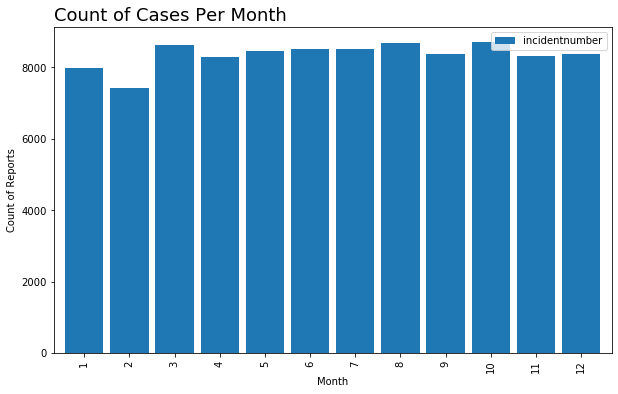

In [70]:
# Group the Crimes per month and produce a bar chart
df_crimes.groupby('month').count().plot(y = 'incidentnumber', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Reports')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)



Huge spike of crime reports from February to March. Spike could be caused by March 11 = SXSW

<h3>Number of crimes occuring on each day</h3>

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a SUNDAY]')

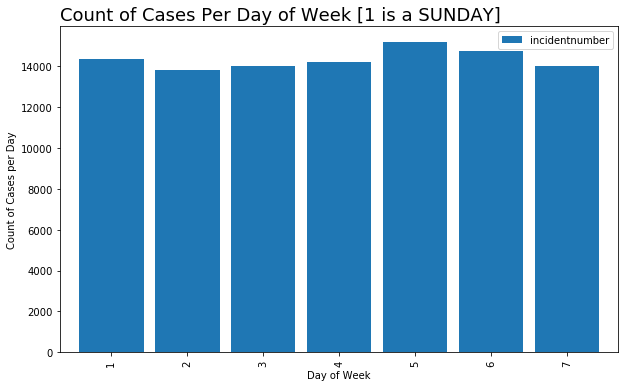

In [71]:
# Group the Crimes per day and produce a bar chart
df_crimes.groupby('day').count().plot(y = 'incidentnumber',
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      colormap='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a SUNDAY]', loc='left', fontsize=18)



There is a small increase in crime reported at the weekend, Saturday and Sunday, but nothing that could be considered significant.

<h3>Number of crimes occuring in each hour</h3>

Text(0.0, 1.0, 'Count of Cases Per Hour]')

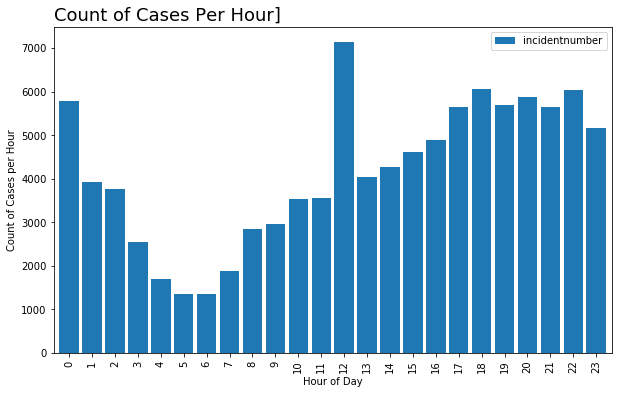

In [72]:
# Group the Crimes per hour and produce a bar chart
df_crimes.groupby('hour').count().plot(y = 'incidentnumber',
                                       kind='bar',
                                       figsize=(10,6),
                                       width=0.85,
                                       colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after seven in the morning. There appears to be a huge spike around midday.


In [73]:
# Number of unique Crime categories bases on the Primary Description
df_crimes.highestoffense.nunique()

282

In [74]:
# What Crimes are the 10 most commonly occuring ones 
df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense'], as_index=False).count().sort_values(
    'incidentnumber', ascending=False).head(10)

highestoffense  incidentnumber
117              FAMILY DISTURBANCE           10526
38              BURGLARY OF VEHICLE           10502
232                           THEFT            9327
56                CRIMINAL MISCHIEF            4629
25   ASSAULT W/INJURY-FAM/DATE VIOL            3346
83              DISTURBANCE - OTHER            3225
237            THEFT BY SHOPLIFTING            2984
134                      HARASSMENT            2648
101                             DWI            2620
27                       AUTO THEFT            2410

In [75]:
# What Crimes are the 3 most commonly occuring ones 
df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense'], as_index=False).count().sort_values(
    'incidentnumber', ascending=False).head(3)



highestoffense  incidentnumber
117   FAMILY DISTURBANCE           10526
38   BURGLARY OF VEHICLE           10502
232                THEFT            9327

In [76]:
# Create a list of the 3 most commonly occuring crimes
top_ten_crimes = df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense']).count().sort_values('incidentnumber', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense']).count().sort_values('incidentnumber', ascending=False)[:3].axes[0].tolist()

In order to get a better understanding of the top three crimes lets first create smaller dataframe the only contains these top crimes. Next we'll visualise these crimes using area charts.


Text(0.0, 1.0, 'Count of Top 3 Cases Per Month')

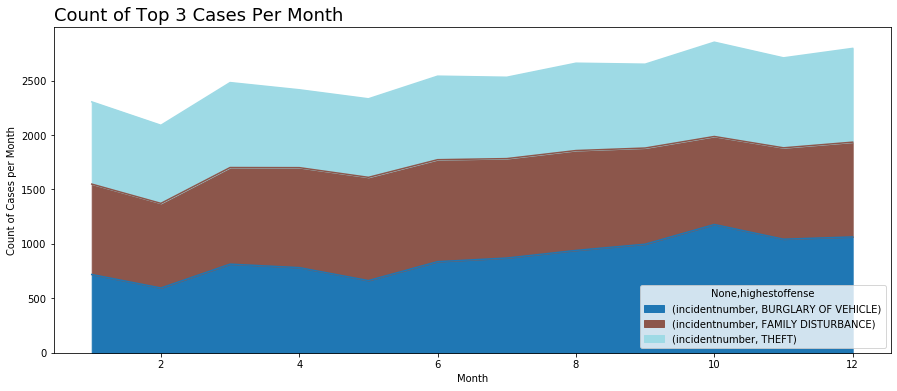

In [77]:
# Create a new data frame with just the top 10 crimes
df_top10_crimes = df_crimes[df_crimes['highestoffense'].isin(top_ten_crimes)].copy()

# Create a new data frame with just the top 3 crimes
df_top3_crimes = df_crimes[df_crimes['highestoffense'].isin(top_three_crimes)].copy()

# Create a pivot area chart of the crimes per month
df_top3_crimes[['incidentnumber', 'highestoffense', 'month']].pivot_table(
    index='month', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases per Month')
plt.title('Count of Top 3 Cases Per Month', loc='left', fontsize=18)

It would appear that crimes peak in the Winter months and then fall off in Autumn. Now look per day.

Text(0.0, 1.0, 'Count of Top 3 Cases Per Day')

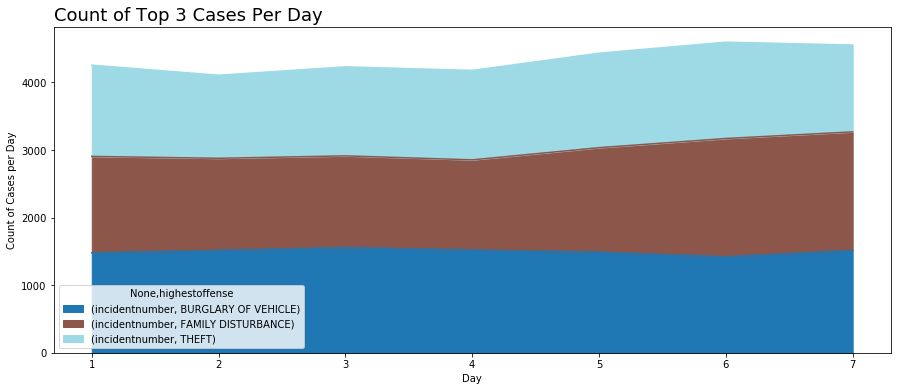

In [78]:
# Create a pivot area chart of the crimes per day
df_top3_crimes[['incidentnumber', 'highestoffense', 'day']].pivot_table(
    index='day', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Top 3 Cases Per Day', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Top 3 Cases Per Hour')

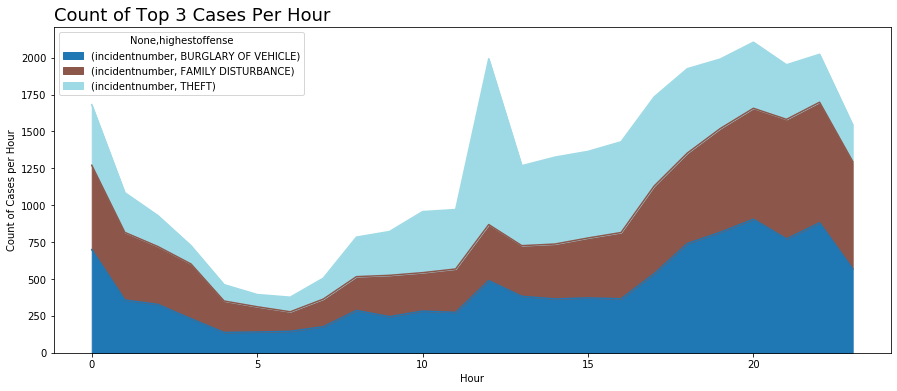

In [79]:
# Create a pivot area chart of the crimes per hour
df_top3_crimes[['incidentnumber', 'highestoffense', 'hour']].pivot_table(
    index='hour', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Top 3 Cases Per Hour', loc='left', fontsize=18)




It would appear that 6:00 am in the morning is the safest time in Austin while 12 pm is the most dangerous.

<h1>Create a folium map </h1>

In [80]:
#Colour each of the top 10 crimes with a different and plot on a Folium map.
# Create a list of 10 colours for top 10 crimes from earlier
colors10 = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours10 = dict(zip(top_ten_crimes, colors10))

# Create a list of 3 colours for top 3 crimes from earlier
colors3 = [
    'red',
    'blue',
    'green'
]

# Create a dictionary of colours to map to the crimes
dict_colours3 = dict(zip(top_three_crimes, colors3))

In [81]:
# Add the colours colums to the df_top_crimes DataFrame
df_top10_crimes['colour'] = df_top10_crimes.highestoffense.map(dict_colours10)

# Filter the top 10 crimes dataframe to extract October only
df_top10_crimes_october = df_top10_crimes[df_top10_crimes.month_name == 'October']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top10_crimes_october.to_csv("CRIME_AUSTIN_map.csv", index=False)

# Add the colours colums to the df_top_crimes DataFrame
df_top3_crimes['colour'] = df_top3_crimes.highestoffense.map(dict_colours3)

# Filter the top 10 crimes dataframe to extract October only
df_top3_crimes_october = df_top3_crimes[df_top3_crimes.month_name == 'October']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top3_crimes_october.to_csv("CRIME_AUSTIN_map2.csv", index=False)

In [83]:
# Create Austin map
austin_map = folium.Map(location=[ 30.2672,  -97.74 ], zoom_start=11)

austin_map

incidents = folium.map.FeatureGroup()

for lat, lng, col in zip(df_top10_crimes_october.latitude, 
                         df_top10_crimes_october.longitude, 
                         df_top10_crimes_october.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, 
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

austin_map.add_child(incidents)

In [85]:
mc = MarkerCluster()

austin_cluster = folium.Map(location = [ 30.2672,  -97.74 ], zoom_start=11)

for row in df_top10_crimes_october.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.highestoffense))
 
austin_cluster.add_child(mc)
austin_cluster

In [86]:
austin_heatmat = folium.Map(location=[ 30.2672,  -97.74 ], zoom_start=11) 

heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top10_crimes_october.iterrows()]

HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(austin_heatmat)

austin_heatmat


<h1>FourSquare Venues in Austin</h1>

In [87]:
CLIENT_ID = 'EWIXALY5NJYVCHFXZMBAFON2DTDSE10KQD20BHC0TAHWN0K0' # your Foursquare ID
CLIENT_SECRET = 'Z10XVHW4AS0KPCCAQRR03BACK5T1CU24ABWA02I0M5OPEO1K' # your Foursquare Secret
VERSION = '20200624'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EWIXALY5NJYVCHFXZMBAFON2DTDSE10KQD20BHC0TAHWN0K0
CLIENT_SECRET:Z10XVHW4AS0KPCCAQRR03BACK5T1CU24ABWA02I0M5OPEO1K


In [88]:
address = 'Austin,TX,USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Restaurant'
radius = 3000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

30.2711286 -97.7436995


'https://api.foursquare.com/v2/venues/search?client_id=EWIXALY5NJYVCHFXZMBAFON2DTDSE10KQD20BHC0TAHWN0K0&client_secret=Z10XVHW4AS0KPCCAQRR03BACK5T1CU24ABWA02I0M5OPEO1K&ll=30.2711286,-97.7436995&v=20200624&query=Restaurant&radius=3000&limit=100'

In [97]:
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


id                                              name  \
0  40b13b00f964a520b1f31ee3  Iron Cactus Mexican Restaurant and Margarita Bar   
1  47e29b8af964a520454e1fe3                 Champions Restaurant & Sports Bar   
2  4dadff2affcb58f1a907e1f0                      Texas Restaurant Association   
3  4a577e5bf964a5203eb61fe3                             Brick Oven Restaurant   
4  49bd49b7f964a52061541fe3                       Cisco's Restaurant & Bakery   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...  v-1594791014    False   
1  [{'id': '4bf58dd8d48988d11d941735', 'name': 'S...  v-1594791014    False   
2  [{'id': '4bf58dd8d48988d126941735', 'name': 'G...  v-1594791014    False   
3  [{'id': '4bf58dd8d48988d110941735', 'name': 'I...  v-1594791014    False   
4  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...  v-1594791014    False   

    location.address location.crossStreet  location.lat  location.lng  \
0     606 Trinity St          at E 6th St     30.267340    -97.739410   
1       300 E 4th St        at Trinity St     30.265519    -97.740274   
2     1400 Lavaca St                  NaN     30.277082    -97.742714   
3  1209 Red River St          E. 12th St.     30.272700    -97.734727   
4      1511 E 6th St             at Comal     30.262975    -97.726802   

                             location.labeledLatLngs  ...  location.country  \
0  [{'label': 'display', 'lat': 30.26734, 'lng': ...  ...     United States   
1  [{'label': 'display', 'lat': 30.2655193, 'lng'...  ...     United States   
2  [{'label': 'display', 'lat': 30.27708244323730...  ...     United States   
3  [{'label': 'display', 'lat': 30.27270027422925...  ...     United States   
4  [{'label': 'display', 'lat': 30.26297494470871...  ...     United States   

                           location.formattedAddress delivery.id  \
0  [606 Trinity St (at E 6th St), Austin, TX 7870...     1582734   
1  [300 E 4th St (at Trinity St), Austin, TX 7870...         NaN   
2  [1400 Lavaca St, Austin, TX 78701, United States]         NaN   
3  [1209 Red River St (E. 12th St.), Austin, TX 7...         NaN   
4  [1511 E 6th St (at Comal), Austin, TX 78702, U...     1962097   

                                        delivery.url delivery.provider.name  \
0  https://www.grubhub.com/restaurant/iron-cactus...                grubhub   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3                                                NaN                    NaN   
4  https://www.grubhub.com/restaurant/ciscos-rest...                grubhub   

              delivery.provider.icon.prefix delivery.provider.icon.sizes  \
0  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   
1                                       NaN                          NaN   
2                                       NaN                          NaN   
3                                       NaN                          NaN   
4  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   

               delivery.provider.icon.name venuePage.id location.neighborhood  
0  /delivery_provider_grubhub_20180129.png          NaN                   NaN  
1                                      NaN     33106632                   NaN  
2                                      NaN          NaN                   NaN  
3                                      NaN     49724895                   NaN  
4  /delivery_provider_grubhub_20180129.png          NaN                   NaN  

[5 rows x 25 columns]

In [98]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0   Iron Cactus Mexican Restaurant and Margarita Bar   
1                  Champions Restaurant & Sports Bar   
2                       Texas Restaurant Association   
3                              Brick Oven Restaurant   
4                        Cisco's Restaurant & Bakery   
5                                Restaurant Altitude   
6                          Copper Bar and Restaurant   
7            FUSE Restaurant & Bar at the Doubletree   
8                                Caroline Restaurant   
9                                 Harbour Restaurant   
10                         Polvos Mexican Restaurant   
11                         Polvos Mexican Restaurant   
12                           RA Sushi Bar Restaurant   
13                        Crimson Restaurant and Bar   
14                                  Slate Restaurant   
15                                Ancho's Restaurant   
16                         Restaurant At Holiday Inn   
17                          Teji's Indian Restaurant   
18                               Mai Thai Restaurant   
19                               Koriente Restaurant   
20                                Emilias Restaurant   
21                Lin Asian Bar + Dim Sum Restaurant   
22                      Sheraton Landmark Restaurant   
23                                Restaurant Freedom   
24                                Acre 41 Restaurant   
25              Z'Tejas Mexican Restaurant and Grill   
26                                       The Belmont   
27                          Teji's Indian Restaurant   
28                      Wilder Wood Restaurant & Bar   
29                           Eddie V's Prime Seafood   
30                           The Caribean Restaurant   
31                                   Stubb's Bar-B-Q   
32                                Chupacabra Cantina   
33                Mi Rey Mexican Restaurant and Cafe   
34                            Gloria's Latin Cuisine   
35                      Henry's Restaurant Y Cantina   
36                                  Frank Restaurant   
37          La Bahia Sea Food and Mexican Restaurant   
38                                        La Condesa   
39                      Roys Hawaiian Fusion Cuisine   
40                                             Trace   
41                                   Carpenters Hall   
42                                    Gabriel's Cafe   
43                        Angie's Mexican Restaurant   
44                                       Pho Thaison   
45                                          Manuel's   
46                              Al Pastor Taco Truck   
47                   Las Cazuelas Mexican Restuarant   
48                      Aster's Ethiopian Restaurant   
49                                  El Sol y La Luna   

                   categories                       address  \
0          Mexican Restaurant                606 Trinity St   
1                  Sports Bar                  300 E 4th St   
2         Government Building                1400 Lavaca St   
3          Italian Restaurant             1209 Red River St   
4          Mexican Restaurant                 1511 E 6th St   
5            Business Service                 701 Brazos St   
6                   Hotel Bar            300 S Congress Ave   
7                   Hotel Bar          1617 N Interstate 35   
8                       Hotel      621 Congress Ave Ste 101   
9                        Food                 720 Brazos St   
10         Mexican Restaurant                 2004 S 1st St   
11         Mexican Restaurant                           NaN   
12        Japanese Restaurant                  117 W 4th St   
13                       Food               407 Colorado St   
14    New American Restaurant                  612 W 6th St   
15         Mexican Restaurant          700 San Jacinto Blvd   
16                 Restaurant                           NaN   
17          Indian Restaurant                           N

In [99]:
dataframe_filtered.name

0     Iron Cactus Mexican Restaurant and Margarita Bar
1                    Champions Restaurant & Sports Bar
2                         Texas Restaurant Association
3                                Brick Oven Restaurant
4                          Cisco's Restaurant & Bakery
5                                  Restaurant Altitude
6                            Copper Bar and Restaurant
7              FUSE Restaurant & Bar at the Doubletree
8                                  Caroline Restaurant
9                                   Harbour Restaurant
10                           Polvos Mexican Restaurant
11                           Polvos Mexican Restaurant
12                             RA Sushi Bar Restaurant
13                          Crimson Restaurant and Bar
14                                    Slate Restaurant
15                                  Ancho's Restaurant
16                           Restaurant At Holiday Inn
17                            Teji's Indian Restaurant
18        

<h2>Venues in Austin downtown</h2>

In [101]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Austin Dow',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

In [107]:
df_crimes.shape

(100228, 13)

<h2>Limit df_crimes since it contains a lot of crime reports, and it will take a lot of time to process for foluim map</h2>

In [126]:
limit = 1000
df_crimes_limit = df_crimes.iloc[0:limit, :]

In [127]:
df_crimes_limit.head()

index  incidentnumber                 highestoffense                 date  \
0      0     20185000070                          THEFT  2018-01-01 17:00:00   
1      1     20185000027                 IDENTITY THEFT  2017-09-30 12:00:00   
2      2     20185000082                  RUNAWAY CHILD  2018-01-01 19:45:00   
3      3       201810723  ASSAULT BY CONTACT FAM/DATING  2018-01-01 03:56:00   
4      4       201811617            PUBLIC INTOXICATION  2018-01-01 19:45:00   

    latitude  longitude  hour  day_name  day month_name  month  year  \
0  30.266100 -97.744003    17    Monday    1    January      1  2018   
1  30.284343 -97.682110    12  Saturday    6  September      9  2017   
2  30.243872 -97.755879    19    Monday    1    January      1  2018   
3  30.445491 -97.784633     3    Monday    1    January      1  2018   
4  30.382900 -97.694358    19    Monday    1    January      1  2018   

  year_month  
0    2018-01  
1    2017-09  
2    2018-01  
3    2018-01  
4    2018-01

In [129]:
a_map = folium.Map(location=[30.26, -97.74], zoom_start=12)
crime = folium.map.FeatureGroup()

for lat, lng, in zip(df_crimes_limit.latitude, df_crimes_limit.longitude):
    crime.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
a_map.add_child(crime)

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Austin Downtown',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, in zip(df_crimes_limit.latitude, df_crimes_limit.longitude):
    crime.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
venues_map.add_child(crime)    

venues_map